<a href="https://colab.research.google.com/github/stepsbtw/Statistical-Inference/blob/main/GCC1625_2025_1_T2_CAIO_PASSOS_TORKST_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inferência Estatística (GCC1625) - Trabalho 2

- Nome completo: Caio Passos Torkst Ferreira
- [Link para vídeo](https://youtu.be/xo7Zm96BZ3w)

#1) Máquina desregulada?

Considere que uma máquina de preenchimento de garrafas está configurada para preencher cada garrafa com 500 ml de vinho. O fabricante suspeita de que essa máquina está preenchendo as garrafas com valores a menor. Ele então coleta uma amostra de 20 garrafas preenchidas a partir da linha de produção e mede cuidadosamente o volume em cada uma delas. Os resultados obtidos nessas medições estão a seguir (valores em miligramas):

$$
484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59, 502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27
$$

Nessa parte do trabalho você deve verificar a alegação de que a máquina está desregulada, conforme a suspeita do fabricante.

In [ ]:
# objetivo final: teste de hipoteses sobre uma média
# Amostra deve vir de uma normal
# z-teste (tenho desvio populacional), t-teste (aproximo, graus de liberdade)

import numpy as np
sample = np.array([484.11,459.49,471.38,512.01,494.48,528.63,493.64,485.03,473.88,501.59,502.85,538.08,465.68,495.03,475.32,529.41,518.13,464.32,449.08,489.27])

1. Os procedimentos paramétricos de testes de hipóteses sobre uma amostra que estudamos em nosso curso presumem que a amostra a ser usada é proveniente de uma distribuição aproximadamente normal. Para a amostra fornecida verifique essa hipótese usando dois dos testes de normalidade que estudamos no curso, o teste de Shapiro-Wilk e o teste usando QQ-plot. Nessa verificação defina o nível de significância como α = 0.05.

In [ ]:
import scipy
import numpy as np

alpha = 0.05
stat, p = scipy.stats.shapiro(sample)
print(p)
if p < 0.05:
  print("Rejeitamos H0")

0.8223267659331017


De acordo com o teste de normalidade de Shapiro, não existe evidência contra a hipótese de que a amostra vem de uma população aproximadamente normal.

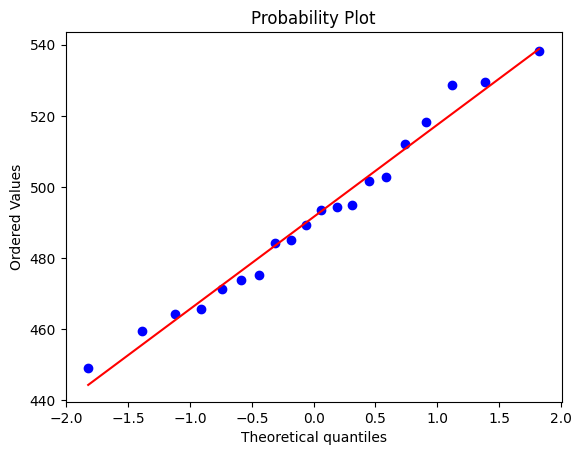

In [ ]:
import matplotlib.pyplot as plt
scipy.stats.probplot(sample, dist="norm", plot=plt)
plt.show()

Auxiliando o teste visualmente com o QQ-plot, a amostra pode ser considerada de uma população aproximadamente normal.

2.  Agora, aplique o teste de hipóteses. Repare que a variância da população é desconhecida; sendo assim, certifique-se de usar o procedimento de teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 1%. Apresente e descreva claramente a aplicação dos quatro passos do procedimento.

In [ ]:
from scipy.stats import t

# 1. hipoteses
'''
H0 : μ0 = 500
Ha : μ < 500 (unilateral a esquerda)
'''
mu0 = 500
mux = sample.mean()
n = len(sample)

# 2. estatistica do teste
t_stat = (mux - mu0)/(sample.std(ddof=1)/np.sqrt(n))

# 3. p valor
if t_stat < 0:
  p = t.cdf(t_stat, df=n-1)
else:
  p = 1 - t.cdf(t_stat, df=n-1)
print(p)

# 4. interpretar
if p < 0.01:
  print("Rejeitamos H0")

0.07243112641629511


Não existe evidência suficiente para rejeitar a hipótese nula.

Com isso, a média não é significantemente diferente de 500 e portanto a máquina não está desregulada.

#2) Um estilo diferente ajuda?

O conjunto de dados fornecido no arquivo golfe.csv lista as pontuações de uma rodada para 75 membros selecionados aleatoriamente em um campo de golfe, primeiro usando seus próprios tacos originais e, dois meses depois, usando novos tacos com um estilo (design) experimental.

Queremos verificar a alegação de que esse novo estilo de taco ajuda no desempenho dos jogadores.

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/golfe.csv", sep=";", index_col=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 1 to 75
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Old Score   75 non-null     int64
 1   New Score   75 non-null     int64
dtypes: int64(2)
memory usage: 1.8 KB


,Old Score,New Score
ID,,
1,81,82
2,72,72
3,77,74
4,74,72
5,78,78


(i) Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos em nosso curso presumem que as amostras a serem usadas são provenientes de uma distribuição aproximadamente normal.

Para cada uma das amostras fornecidas, verifique essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso, use um nível de significância igual a 5%.

In [ ]:
x_old = df["Old Score"]
x_new = df["New Score "]
len(x_old), len(x_new)

(75, 75)

In [ ]:
from scipy.stats import normaltest

stat, p1 = normaltest(x_old)
stat, p2 = normaltest(x_new)

print(p1)
if p1 < 0.5:
  print("Rejeitamos H0")
print(p2)
if p2 < 0.5:
  print("Rejeitamos H0")

1.4234036860841066e-06
Rejeitamos H0
0.0005513413259119283
Rejeitamos H0


Existe evidência apartir do teste de D'Agostino de que as amostras **não** são provenientes de uma distribuição aproximadamente normal.

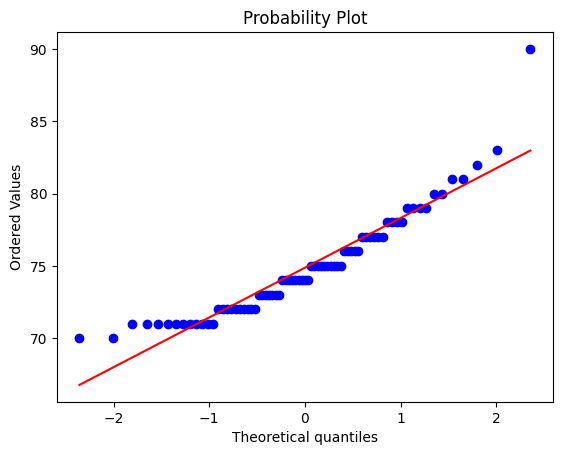

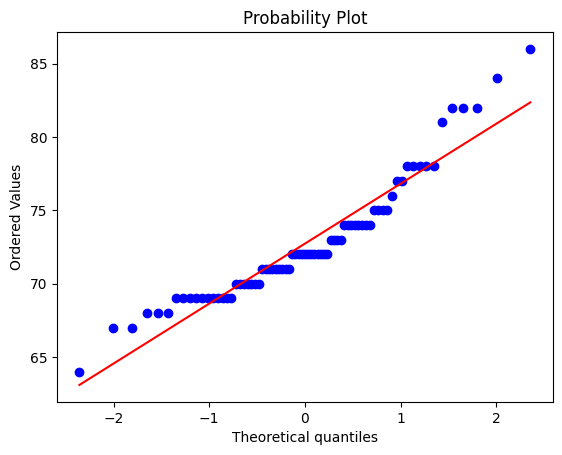

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
probplot(x_old, dist="norm", plot=plt)
plt.show()
probplot(x_new, dist="norm", plot=plt)
plt.show()

Auxiliando visualmente com os QQ-Plots, percebe-se que suas caudas são um pouco mais "pesadas" (leptocúrtica), portanto desviando das distribuições normais.


(ii) Agora, aplique o teste de hipóteses propriamente dito. Apresente e descreva claramente a aplicação dos quatro passos do procedimento. Repare que a variância da população
não é conhecida. Sendo assim, certifique-se de usar o teste de hipóteses adequado para essa situação.

Apresente sua análise para o nível de significância igual a 1%.

0.9996


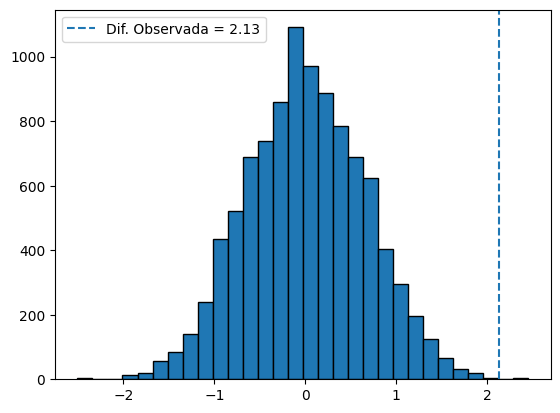

In [ ]:
# usar o novo estilo impacta no desempenho? teste pareado!

# as distribuicoes não são normais.
# teste da permutacao!

# 1. hipoteses
'''
H0: mu1-mu2 = 0
Ha: mu1-mu2 < 0
'''

# 2. estatistica
xd_obs = x_old.mean() - x_new.mean()
data = np.concatenate((x_old, x_new))

# permutar e recalcular estatistica
xd = []
for i in range(10000):
  np.random.shuffle(data)
  n1 = len(x_old)
  x1 = data[:n1]
  x2 = data[n1:]
  xd.append(x1.mean() - x2.mean())

# 3. p valor
xd = np.array(xd)
p = np.mean(xd <= xd_obs) # proporcao dos valores que sao menores ou iguais que a media observada

# 4. interpretar
print(p)
if p < 0.01:
  print("Rejeitamos H0")

# visualizacao
plt.hist(xd, bins=30, edgecolor='black')
plt.axvline(xd_obs, linestyle='dashed', label=f'Dif. Observada = {xd_obs:.2f}')
plt.legend()
plt.show()

Não existe evidência suficiente de que as médias da pontuação com o taco novo é maior que a pontuação antiga.

Portanto, não se pode afirmar que o novo taco melhora o desempenho dos jogadores.

#3) Transmissões: automática versus manual

O conjunto de dados mtcars apresenta informações sobre modelos de carros. Esse conjunto de dados contém várias variáveis.

Entretanto para essa parte do trabalho, duas delas são relevantes:

• am - essa variável categórica indica o tipo de sistema de transmissão usado no modelo de automóvel (0 = automatic, 1 = manual). Com base nessa variável, podemos formar duas amostras independentes: veículos com transmissão automática e veículos com transmissão manual.

• mpg (miles per gallon) — variável quantitativa contínua que mede o consumo de combustível, indicando quantas milhas o veículo percorre por galão de combustível. Valores
maiores indicam maior eficiência energética.

Utilizando essas informações, responda aos itens a seguir com base nos métodos estudados em aula.


In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/mtcars.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
automatico = df[df["am"]==0]["mpg"]
manual = df[df["am"]==1]["mpg"]
len(automatico), len(manual)

(19, 13)

(i) Realize uma análise gráfica exploratória comparando o consumo médio de combustível dos dois grupos de veículos. Utilize ao menos dois tipos de gráfico (como boxplot e histogramas sobrepostos) e comente os padrões observados.

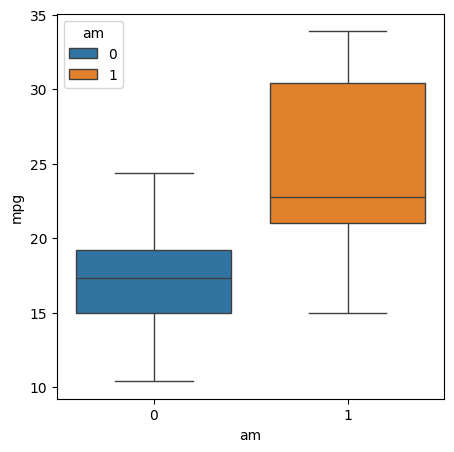

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.boxplot(x='am', y='mpg', hue='am', data=df)
plt.show()

Com o BoxPlot, podemos ver que veículos manuais costumam ser mais eficientes (mediana maior, +50% dos manuais são mais eficientes), porém, os carros automáticos variam bem menos no consumo entre si.

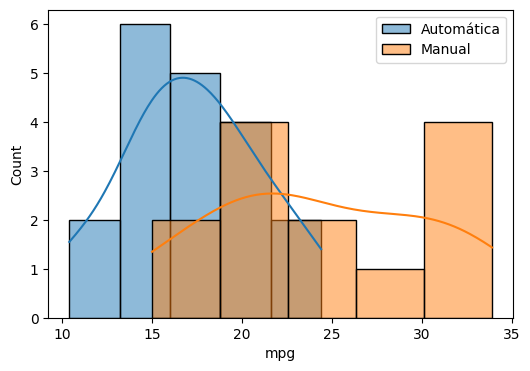

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(automatico, label='Automática', kde=True, bins=5)
sns.histplot(manual, label='Manual', kde=True, bins=5)
plt.legend()
plt.show()

Com o histograma podemos notar que a distribuição do consumo entre os carros manuais é bem mais espalhada. Os automáticos parecem estar concentrados numa eficiência baixa de milhas por galão.

Apartir desses gráficos podemos sustentar a hipótese de que a "marcha" do carro impacta na eficiência.

(ii) Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos
em nosso curso presumem que as amostras a serem usadas são provenientes de uma
distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique
essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso,
use um nível de significância igual a 5%.

p_val =  0.8987357901905731


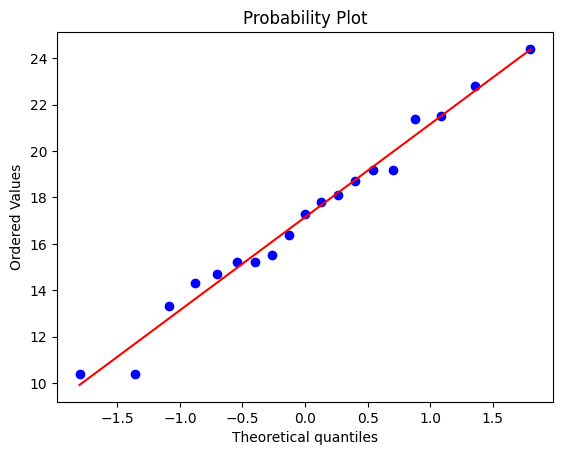

In [ ]:
from scipy.stats import shapiro
from scipy.stats import probplot

stat, p = shapiro(automatico)
print("p_val = ",p)

probplot(automatico, dist="norm", plot=plt)
plt.show()

p_val =  0.536272885248448


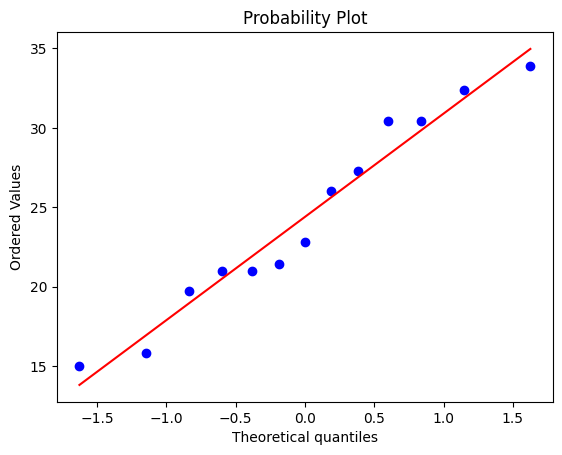

In [ ]:
stat, p = shapiro(manual)
print("p_val = ",p)

probplot(manual, dist="norm", plot=plt)
plt.show()

Existe evidência suficiente de que as amostras vieram de distribuições aproximadamente normais.

(iii) Presumindo que os dados da coluna mpg seguem a distribuição normal, determine um intervalo de confiança no nível 95% da diferença entre as médias dos modelos de carros que possuem transmissão automática e os que possuem transmissão manual.

In [ ]:
# intervalo com variancias desiguais
from scipy.stats import t

# diferenca das medias
xd = manual.mean() - automatico.mean()

s1, s2 = automatico.std(ddof=1), manual.std(ddof=1)
n1, n2 = len(manual), len(automatico)

# erro padrao
SE = np.sqrt((s1**2)/n1 + (s2**2)/n2)

# graus de liberdade (welch)
dfn = (s1**2 / n1 + s2**2 / n2)**2
dfd = ((s1**2 / n1)**2)/(n1-1) + ((s2**2 / n2)**2)/(n2-1)

# valor critico
t_score = t.ppf(0.975, df=(dfn/dfd))

lower = xd - t_score * SE
upper = xd + t_score * SE

print(f"({lower:.4f}, {upper:.4f})")

(3.6296, 10.8602)


(iv) Suponha que, ao analisar os dados fornecidos, alguém levantou a alegação de que carros automáticos e manuais não apresentam a mesma eficiência relativa a consumo de combustível. Em particular, existe a suspeita de que carros com transmissão manual consumem (em média) menos combustível que suas contrapartidas com transmissão automática.

Aplique um teste de hipóteses para verificar essa suspeita. Apresente e descreva claramente a aplicação dos quatro passos do procedimento. Repare que são fornecidas duas amostras independentes. Sendo assim, certifique-se de usar o teste de hipóteses adequado
para essa situação. Apresente sua análise para o nível de significância igual a 5%.

In [ ]:
# aproximadamente normais
# t-teste independente (variancias desiguais) unilateral a direita

from scipy.stats import t

# 1. hipoteses
'''
H0: Apresentam a mesma eficiencia
Ha: Carros manuais consomem em media menos combustivel que automaticos

H0: mu_manual - mu_auto = 0
Ha: mu_manual - mu_auto > 0
'''
xd = manual.mean() - automatico.mean()

# 2. calcular estatistica
n1 = len(manual)
n2 = len(automatico)

s1 = manual.std(ddof=1)
s2 = automatico.std(ddof=1)
SE = np.sqrt((s1**2)/n1 + (s2**2)/n2)

t_stat = xd/SE

# 3. p valor
df_n = ((s1**2)/n1 + (s2**2)/n2)**2
df_d = (((s1**2)/n1)**2)/(n1-1) + (((s2**2)/n2)**2)/(n2-1)

p = 1 - t.cdf(t_stat, df=(df_n/df_d))

# 4. interpretar
print(p)
if p < 0.05:
  print("Rejeitamos H0")

0.0006868191665354573
Rejeitamos H0


Existe evidência suficiente de para afirmar que os carros manuais em média consomem uma quantidade significantemente menor que os carros automáticos.

#4) Teste ANOVA

### 4.1) Situação-problema I
Nesta parte, você deve estudar as condições que permitem usar o método de análise de variância (ANOVA) para determinar se um grupo de populações tem uma média comum. Os dados apresentados nas figuras 1, 2 e 3 correspondem às estimativas de milhas percorridas por galão obtidas para amostras de modelos de carros de 1993, conforme relatado pelo Consumer Reports:
The 1993 Cars - Annual Auto Issue (abril de 1993).

(i) Se uma ou mais das amostras não passam no teste de normalidade, então não podemos usar o método ANOVA. Sendo assim, antes de poder usar esse teste, você deve verificar as condições de aplicabilidade dele. Primeiro verifique, se as amostras são aproximadamente normalmente distribuídas. Em seguida, usando o teste de Levene, verifique se as amostras possuem variâncias iguais do ponto de vista estatístico.

p_val =  0.13663509547088665
Não Rejeita H0


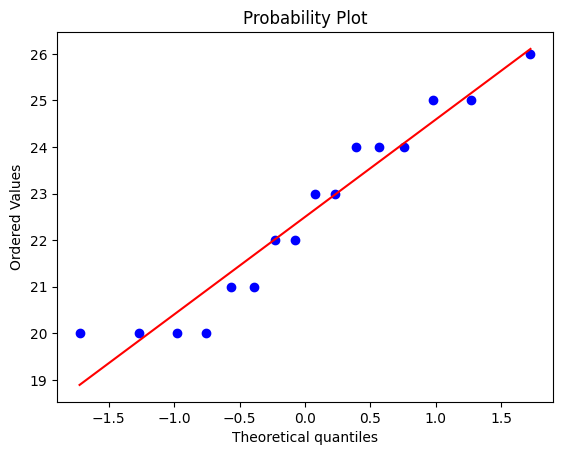

p_val =  0.46937828838635787
Não Rejeita H0


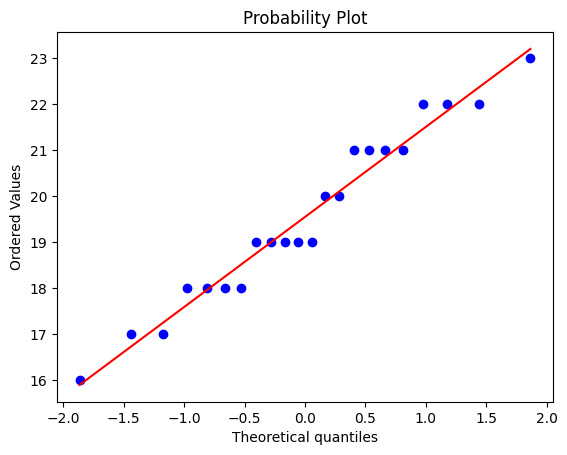

p_val =  0.20412792326477264
Não Rejeita H0


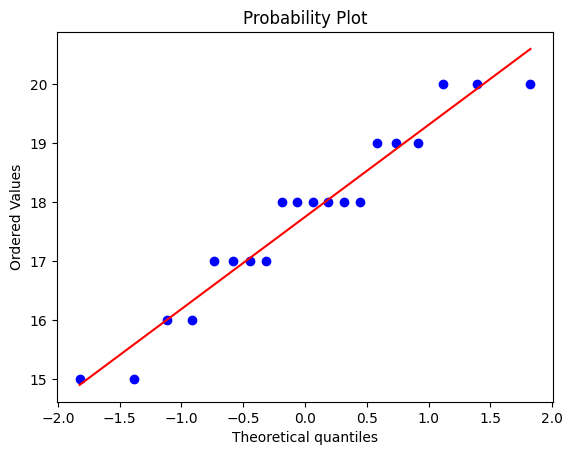

In [ ]:
from scipy.stats import shapiro
from scipy.stats import probplot

compactos = np.array([20, 25, 25, 20, 22, 22, 24, 26, 20, 24, 24, 23, 20, 23, 21, 21])

medios = np.array([18, 19, 22, 22, 19, 16, 21, 21, 21, 20,17, 18, 18, 17, 19, 19, 18, 21, 23, 19, 22, 20])

grandes = np.array([19, 16, 16, 17, 20, 20, 20, 18, 18, 19, 19, 15, 18, 17, 15, 18, 17, 18, 18, 17])

_, p = shapiro(compactos)
print("p_val = ",p)
if p < 0.05:
  print("Rejeita H0")
else:
  print("Não Rejeita H0")
probplot(compactos, dist="norm", plot=plt)
plt.show()

_, p = shapiro(medios)
print("p_val = ",p)
if p < 0.05:
  print("Rejeita H0")
else:
  print("Não Rejeita H0")
probplot(medios, dist="norm", plot=plt)
plt.show()

_, p = shapiro(grandes)
print("p_val = ",p)
if p < 0.05:
  print("Rejeita H0")
else:
  print("Não Rejeita H0")
probplot(grandes, dist="norm", plot=plt)
plt.show()

Todas as amostras são provenientes de distribuições aproximadamente normais.

In [ ]:
# teste de levene -> as variancias das distribuicoes sao iguais?

# H0: var1 = var2 = var3
# Ha: pelo menos um par de variancias sao diferentes

from scipy.stats import levene
_, p = levene(compactos, medios, grandes)

print("p_val =", p)
if p < 0.05:
  print("Rejeita H0")

p_val = 0.22250768201214688


Não existe evidencia suficiente que há diferenca estatisticamente significativa entre pelo menos um par de variâncias das amostras.

(ii) Agora que você verificou as condições aplicabilidade do ANOVA, aplique esse teste para verificar a hipótese nula de que as três populações têm médias estatisticamente iguais. Declare as hipóteses nula e alternativa. A seguir, descreva sua conclusão. Use nível de significância de 5%.


In [ ]:
# teste anova (one way)
from scipy.stats import f_oneway

'''
H0 : mu1 = mu2 = mu3
Ha : pelo menos um par de medias sao diferentes
'''

_,p = f_oneway(compactos, medios, grandes)

print("p_val = ", p)
if p < 0.05:
  print("Rejeita H0")

p_val =  1.1426698001297824e-09
Rejeita H0


Existe evidencia suficiente que há diferença estatisticamente significativa entre pelo menos um par de médias das amostras.

### 4.2) Situação-problema II
Em http://www.flatworldknowledge.com/sites/all/files/data9.xls, você encontra dados que registram os custos dos materiais (livro didático, manual de solução, taxas de laboratório e assim por diante) em cada um dos dez cursos diferentes em cada um dos três assuntos diferentes, química, ciência da computação e matemática.

Verifique, ao nível de significância de 1%, se os dados fornecem evidências suficientes para concluir que os custos médios nas três disciplinas não são todos iguais. Apresente os detalhes de aplicação todos os quatro passos do teste de hipóteses.


In [ ]:
import pandas as pd
df = pd.read_excel("http://www.flatworldknowledge.com/sites/all/files/data9.xls")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cource  30 non-null     object
 1   Cost    30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


,Cource,Cost
0,MATH1,195
1,MATH2,129
2,MATH3,119
3,MATH4,122
4,MATH5,135


In [ ]:
math = df[df["Cource"].str.contains("MATH")]["Cost"]
comp = df[df["Cource"].str.contains("COMP")]["Cost"]
chem = df[df["Cource"].str.contains("CHEM")]["Cost"]

print(math)

0    195
1    129
2    119
3    122
4    135
5    210
6    137
7    199
8    220
9    149
Name: Cost, dtype: int64


In [ ]:
# os custos medios das 3 disciplinas sao iguais

from scipy.stats import f

# 1. Hipoteses
'''
H0: mu1 = mu2 = mu3
Ha: pelo menos um par de medias é diferente
'''

# Parametros
x = df["Cost"].mean() # media global
N = len(df)
k = 3  # número de grupos
n1 = n2 = n3 = len(math)  # tamanhos iguais

x1, x2, x3 = math.mean(), comp.mean(), chem.mean()
s1, s2, s3 = math.std(ddof=1), comp.std(ddof=1), chem.std(ddof=1)

df_inter = k - 1
df_intra = N - k

var_inter = (n1 * (x1 - x)**2 + n2 * (x2 - x)**2 + n3 * (x3 - x)**2) / df_inter
var_intra = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2 + (n3 - 1) * s3**2) / df_intra

# 2. Estatística F
F = var_inter / var_intra

# 3. p-valor
p = 1 - f.cdf(F, dfn=df_inter, dfd=df_intra)

# 4. Interpretação
print("p-valor:", p)
if p < 0.05:
  print("Rejeitamos H0")
else:
  print("Não rejeitamos H0")

p-valor: 0.2596535697144
Não rejeitamos H0


Não existe evidência suficiente para afirmar que há diferença estatística significativa entre os custos médios de cada assunto de cada curso.

#5) Testes Qui-quadrado




###5.1) Distribuição χ²
Suponha que uma variável aleatória Y siga a distribuição χ² com k graus de liberdade, isto é, Y ∼ χ²(k). Por meio das funções apropriadas de R ou de Python, compute o que se pede a seguir. Considere que k = 13.

(i) Pr(Y > 2.56)

In [ ]:
from scipy.stats import chi2
Y = 1 - chi2.cdf(2.56, df=13)
Y

np.float64(0.9991125857338248)

(ii) Pr(2.56 < Y < 4.87)

In [ ]:
Y = chi2.cdf(4.87, df=13) - chi2.cdf(2.56, df=13)
Y

np.float64(0.021168183378387335)

(iii) O valor de y tal que Pr(Y < y) = 0.95

In [ ]:
y = chi2.ppf(0.95, df=13)
y

np.float64(22.362032494826934)

###5.2) Teste χ² (situação-problema I)
Considere novamente o conjunto de dados denominado mtcars. Para este conjunto de dados, descubra se as variáveis cyl e carb são ou não dependentes. Para isso, utilize o teste χ². Apresente o desenvolvimento, isto é, os comandos em R ou Python que você utilizou para chegar à conclusão.

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
# Teste X² independente (cyl e carb)

'''
H0 : nao há dependencia
Ha : há dependencia
'''

from scipy.stats import chi2_contingency

tab = pd.crosstab(df["cyl"], df["carb"])
_, p, _, _= chi2_contingency(tab)

print(p)
if p < 0.05:
  print("Rejeitamos H0")
else:
  print("Não rejeitamos H0")

0.006632477762992059
Rejeitamos H0


Existe evidência suficiente para afirmar que as variáveis são dependentes.

###5.3) Teste χ2 (situação-problema II)

A fabricante das balinhas Zuzuba produz balinhas de diferentes cores. Esse fabricante alega que cada pacote produzido contém quantidades de balinhas de cada cor que não diferem significativamente das que são apresentadas na segunda coluna da tabela Tabela 1. Para testar essa alegação, um auditor comprou um pacote de Zuzubas em uma loja perto de sua casa e contou as quantidades de cada cor. Os dados levantados pelo auditor estão na terceira coluna da Tabela 1. Se o fabricante estiver correto, então não deve haver diferença significativa entre as quantidades de diversas cores de Zuzubas que ela alega depositar em cada pacote e as quantidades que o auditor encontrou.

In [ ]:
observado = np.array([18, 19, 16, 6, 24, 17])
esperado = np.array([24, 16, 13, 20, 20, 14])

(i) Utilizando o R ou Python, apresente dois gráficos de setores (pie charts), um para as quantidades esperadas e outro para as quantidades observadas de cores.

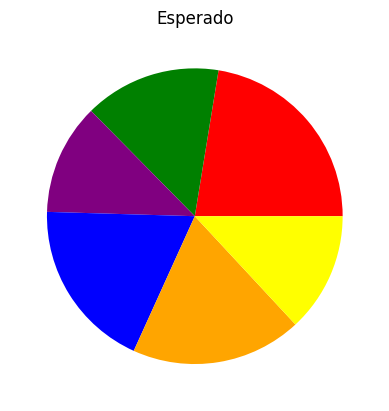

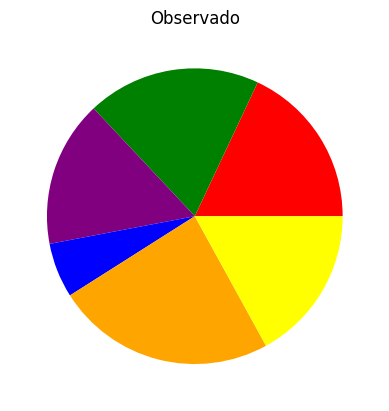

In [ ]:
import matplotlib.pyplot as plt

colors = ("red", "green", "purple","blue", "orange", "yellow")

plt.pie(esperado, colors=colors)
plt.title("Esperado")
plt.show()

plt.pie(observado, colors=colors)
plt.title("Observado")
plt.show()

(ii) Também utilizando R ou Python, teste a hipótese nula de que a alegação do fabricante é verdadeira, usando nível de significância α = 0.05. Apresente os seguintes valores: graus de liberdade, valor da estatística e o valor-p. Apresente também a sua conclusão, contra ou a favor da hipótese nula, justificando sua resposta.


In [ ]:
# para o teste de aderencia a soma das frequencias observadas e esperadas precisam ser iguais!
esperado.sum(), observado.sum()

(np.int64(107), np.int64(100))

In [ ]:
# a quantidade de balas de cada cor segue a tabela.
# teste X² goodness of fit

'''
H0: a distribuicao observada segue a teorica
Ha: nao segue a teorica
'''

from scipy.stats import chisquare

esperado = esperado * (observado.sum()/esperado.sum())
print(esperado)

_, p = chisquare(observado, f_exp=esperado)

print(p)
if p < 0.05:
  print("Rejeita H0")
else:
  print("Não Rejeita H0")

[22.42990654 14.95327103 12.14953271 18.69158879 18.69158879 13.08411215]
0.012792019946805051
Rejeita H0


Existe evidência suficiente para afirmar que a distribuição observada não segue a distribuição esperada.

Isto é, a quantidade de balinhas que o fabricante alega não é verdadeira.

###5.4) Teste χ² (situação-problema III)
Considere um caso hipotético em que se deseja testar a eficácia de um medicamento para um determinado problema médico. Suponha que temos 105 pacientes em estudo e 50 deles foram tratados com a droga. Os restantes 55 pacientes foram mantidos como amostras de controle. O estado de saúde de todos os pacientes foi verificado após uma semana. Os dados e resultados para todos esse indivíduos podem ser encontrados no arquivo treatment.csv

A tabela de contingência para o conjunto de dados fornecido pode ser produzida por meio dos comandos na Listagem 2 e na Listagem 3

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/treatment.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           105 non-null    int64 
 1   treatment    105 non-null    object
 2   improvement  105 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.6+ KB


,id,treatment,improvement
0,1,treated,improved
1,2,treated,improved
2,3,not-treated,improved
3,4,treated,improved
4,5,treated,not-improved


In [ ]:
tab = pd.crosstab(df['treatment'], df['improvement'], margins = False)
print(tab)

improvement  improved  not-improved
treatment                          
not-treated        26            29
treated            35            15


Nesta situação problema, temos duas variáveis discretas, uma que indica se o paciente foi tratado com o medicamento (treated ou not-treated), e outra que indica se o paciente melhorou ou não (improved ou not-improved) Utilizando R ou Python, verifique a alegação de que as duas variáveis são dependentes, usando nível de significância α = 0.05

In [ ]:
'''
H0: as variaveis sao independentes
Ha: as variaveis dependem
'''

_, p, _, _= chi2_contingency(tab)
print(p)

if p < 0.05:
  print("Rejeita H0")
else:
  print("Não Rejeita H0")

0.030827072412198585
Rejeita H0


Existe evidência suficiente para afirmar que há dependência entre as variáveis.

Portanto, podemos concluir que o paciente ter sido tratado ou não com o medicamento tem relação sim com a melhora do paciente.

#5.5 Teste χ² (situação-problema IV)
Em http://www.flatworldknowledge.com/sites/all/files/data4.xls, está disponível um conjunto de dados que registra o resultado de 500 arremessos de um dado de seis lados. Verifique, ao nível de significância de 10%, se há evidência suficiente para concluir que o dado não é “justo” (ou “balanceado”), ou seja, que a distribuição de probabilidade difere da probabilidade 1/6 para cada das seis faces do dado. Forneça a descrição detalhada dos quatro passos de aplicação do teste.

In [ ]:
import pandas as pd
df = pd.read_excel("http://www.flatworldknowledge.com/sites/all/files/data4.xls")
df.head()

,Trial Number,Die Result
0,1,3
1,2,1
2,3,5
3,4,3
4,5,5


In [ ]:
# teste X² de aderência

# 1. hipoteses
'''
H0: as proporcoes de cada lado sao uniformes = 1/6
Ha: alguma proporcao é diferente de 1/6
'''
from scipy.stats import chi2

#2. estatistica do teste
N = len(df)
k = 6
esperado = N * 1/6
observados = np.array(df["Die Result"].value_counts())

chi2_stat = np.array(((observados-esperado)**2) / esperado).sum()

#3. p valor
p = 1 - chi2.cdf(chi2_stat, df=k-1)
print(p)
if p < 0.1:
  print("Rejeitamos H0")
else:
  print("Não rejeitamos H0")

0.7086191751824792
Não rejeitamos H0


Existe evidência suficiente para considerar o dado justo. Todos os lados saem com uma probabilidade estatisticamente justa.

#6) Teste da Permutação

A Figura 4 mostra os resultados de um experimento no qual 7 de 16 camundongos foram selecionados aleatoriamente para receber um novo tratamento médico, enquanto os 9 restantes foram atribuídos ao grupo sem tratamento (controle). O tratamento tinha como objetivo prolongar a sobrevivência após uma cirurgia de teste. Em particular, a coluna “Data” mostra o tempo de sobrevivência após a cirurgia, em dias, para todos os 16 camundongos. Essa mesma figura também apresenta, para cada amostra: tamanho, média, desvio padrão.

Utilize o teste de permutação para responder à seguinte pergunta de pesquisa (use nível de significância igual a 5%): O tratamento prolongou a sobrevivência?. Você deve apresentar a declaração das hipóteses, descreva como calculou a estatística de deste e o p-valor, a finalmente apresente sua conclusão.

In [ ]:
tratamento = [94, 197, 16, 38, 99, 141, 23]
x_t = 86.86
s_t = 25.24
n_t = 7

controle = [52, 104, 16, 10, 50, 31, 40, 27, 52]
x_c = 56.22
s_c = 14.14
n_c = 9

xd_obs = 30.63
SE = 28.93

In [ ]:
# 1. hipoteses
'''
H0: Tratamento não teve efeito. mu_t - mu_c = 0
Ha: Tratamento teve efeito. mu_t - mu_c > 0
'''

#2. estatistica
dados = np.concatenate((tratamento, controle))
diffs = []
for i in range(10000):
  np.random.shuffle(dados)
  n1 = len(tratamento)
  x1 = dados[:n_t]
  x2 = dados[n_t:]
  diffs.append(x1.mean() - x2.mean())

# 3. p valor
diffs = np.array(diffs)
p = np.mean(diffs >= xd_obs) # proporcao dos valores que sao menores ou iguais que a media observada

# 4. interpretar
print(p)
if p < 0.05:
  print("Rejeitamos H0")
else:
  print("Não rejeitamos H0")

0.131
Não rejeitamos H0


Não existe evidência para afirmar que o tratamento prolonga a vida dos camundongos.

# 7) Bootstrap

Essa parte do trabalho é uma adaptação do Problema 9 na seção 5.4 de An Introduction to Statistical Learning. O conjunto de dados usado aqui é o denominado Boston. Uma descrição desse conjunto de dados pode ser encontrada em http://lib.stat.cmu.edu/datasets/boston.

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/Boston.csv", index_col=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


(i) Com base neste conjunto de dados, forneça uma estimativa pontual para a média populacional da variável medv. Chame essa estimativa ̂μ.

In [ ]:
mu_hat = df["medv"].mean()
mu_hat

np.float64(22.532806324110677)

(ii) Forneça uma estimativa do erro padrão de ̂μ. Interprete o resultado.

In [ ]:
s = df["medv"].std(ddof=1)
n = len(df["medv"])
SE = s/np.sqrt(n)
SE

np.float64(0.4088611474975351)

Ao amostrar aleatóriamente, a média dos valores poderia variar **em torno** de 0.409 de uma amostra para outra.

(iii) Agora estime o erro padrão de ̂μ usando o método Bootstrap. Como essa estimativa se compara com sua resposta de (ii)?

In [ ]:
means = []

for _ in range(10000):
   sample = np.random.choice(df["medv"], size=n, replace=True)
   means.append(np.mean(sample))

SE_B = np.std(means, ddof=1)
SE_B

np.float64(0.4129451588090053)

A estimativa bootstrap aproxima muito bem a analítica nesse caso.

Como a amostra é grande, os dois métodos convergem para valores semelhantes.

(iv) Com base em sua estimativa de bootstrap de (iii), forneça um intervalo de confiança de 95% para a média de medv. Compare-o com os resultados obtidos usando t-test sobre o atributo medv.

In [ ]:
lower = np.percentile(means, 2.5)
upper = np.percentile(means, 97.5)
print(f"Bootstrap : ({lower:.4f}, {upper:.4f})")

ic = t.interval(0.95, df=n-1, loc=mu_hat, scale=SE)
print(f"T-teste : ({ic[0]:.4f}, {ic[1]:.4f})")

Bootstrap : (21.7271, 23.3423)
T-teste : (21.7295, 23.3361)


Ambos os casos estimam o valor de medv bem.

(v) Com base neste conjunto de dados, forneça uma estimativa, µˆmed, para a mediana populacional de medv.

In [ ]:
mu_hat_med = df["medv"].median()
mu_hat_med

21.2

(vi) Agora você deve estimar o erro padrão de µˆmed. Infelizmente, não há uma fórmula simples para calcular o erro padrão da mediana. Em vez disso, estime o erro padrão da mediana usando o método bootstrap. Comente suas descobertas.

In [ ]:
medians = []
for _ in range(10000):
  sample = np.random.choice(df["medv"], size=n, replace=True)
  medians.append(sample.mean())

SE_med = np.std(medians)
SE_med

np.float64(0.41051927689828965)

Como dito, não há forma analitica de estimar o erro padrão de outras estatísticas como a mediana, reforçando a importância do Bootstrap.

O erro padrão da mediana estimado pelo Bootstrap ficou muito próximo ao erro padrão da média.

Nesse caso, isso sugere que distribuição dos dados é razoávelmente simétrica.

(vii) Forneça uma estimativa para o décimo percentil do atributo medv. Chame
essa quantidade de µˆ0.1.

In [ ]:
mu_hat_10 = np.percentile(df["medv"], 10)
mu_hat_10

np.float64(12.75)

(viii) Use o método bootstrap para estimar o erro padrão de µˆ0.1. Comente suas descobertas.

In [ ]:
p_10s = []
for _ in range(10000):
  sample = np.random.choice(df["medv"], n, replace=True)
  p_10s.append(np.percentile(sample,10))
se_10 = np.std(p_10s, ddof=1)
se_10

np.float64(0.4931646218398309)

O erro padrão do percentil mede a variabilidade da estimativa desse percentil entre diferentes possíveis amostras. É um pouco mais instável que a mediana mas isso é comum nas caudas das distribuições (+dispersas)

Enfim, estimar o erro padrão da estimativa ajuda a ter uma noção da **incerteza** da estimativa encontrada.

#8) Teste de Permutação vs Bootstrap


Uma empresa quer saber se é eficiente ensinar novas ferramentas aos seus funcionários usando cursos pela internet. A empresa seleciona aleatoriamente 7 trabalhadores e os atribui a dois grupos de tamanhos 4 e 3. O primeiro grupo frequentou aulas tradicionais, e o segundo frequentou cursos pela internet. Após a realização dos cursos, foi aplicado um teste aos trabalhadores,
cujos resultados foram:

- Cursos na Internet: 37, 49, 55, 57
- Cursos tradicionais: 23, 31, 46

Verifique se os cursos da Internet são mais efetivos do que os cursos tradicionais. Para isso, aplique um teste de permutação e um teste de bootstrap. Use o nível de significância α = 0.1. Os dois testes levam à mesma conclusão?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

internet = np.array([37, 49, 55, 57])
tradicional = np.array([23, 31, 46])
n1 = len(internet)
n2 = len(tradicional)

# estatistica observada
obs_diff = np.mean(internet) - np.mean(tradicional)

# Teste de permutação
dados = np.concatenate([internet, tradicional])
perm_diffs = []

for _ in range(10000):
    np.random.shuffle(dados)
    perm_diff = np.mean(dados[:n1]) - np.mean(dados[n1:])
    perm_diffs.append(perm_diff)

p_perm = np.mean(np.array(perm_diffs) >= obs_diff)

# Teste de bootstrap
boot_diffs = []
for _ in range(10000):
    x1 = np.random.choice(internet, size=n1, replace=True)
    x2 = np.random.choice(tradicional, size=n2, replace=True)
    boot_diffs.append(np.mean(x1) - np.mean(x2))

boot_diffs = np.array(boot_diffs)
p_boot = np.mean(boot_diffs >= obs_diff)

print('p value (Permutação): ', p_perm)
if p_perm < 0.1:
  print("Permutação rejeita H0\n")
else:
  print("Permutação não rejeita H0\n")

print('p value (Bootstrap): ', p_boot)
if p_perm < 0.1:
  print("Bootstrap rejeita H0")
else:
  print("Bootstrap não rejeita H0")

p value (Permutação):  0.0557
Permutação rejeita H0

p value (Bootstrap):  0.5281
Bootstrap rejeita H0


Os dois testes levam a mesma conclusão.

Nenhum deles reconhece que existe evidência suficiente para afirmar que a média de desempenho com os cursos de Internet é significantemente maior que os Tradicionais.